<span style="color:#333333; font-size:24px; font-weight:bold">  Initial & Exploratory Data Analysis by <a href=https://github.com/cyterat style="color:#00b2b7;">cyterat</a></span>

<img src="https://pwimages-a.akamaihd.net/arc/6d/07/6d070b0efab67dfa6cee67e718653c271430891855.png"></img>

# Important Notice
**The original analysis contained Personal Identifiable Information (PII).**

**The structured report containing the analysis summary and visualizations was done separately.**

**The list below shows changes made after the analysis originaly took place, to share the notebook publicly (github & portfolio website):**
- Removed guild name
- Removed guild logo
- Added function masking character names and account names
- Added function masking custom guild ranks

**Unrelated to PII changes:**
- Changed headers
- Deleted redundant code cells and added comments
- Changed some code and re-ran the notebook to support newer Python version
- Created 2 separate notebooks with eda and statistical analysis 

In [1]:
# THIS FUNCITON WAS CREATED TO MASK SENSITIVE INFORMATION, ALLOWING TO SHARE THIS NOTEBOOK PUBLICLY
def mask_column(column):
    """
    This function replaces and reorders characters in a column 
    using the existing set of characters to mask sensitive data.

    Parameters:
        - column (pd.Series): DataFrame column to mask sensitive data

    Returns:
        - pd.Series: masked column
    """
    column = pd.Series(column)

    def shuffle_string(text):
        return ''.join([np.random.choice(list(text)) for _ in range(len(text))])

    ref = {}
    for i,e in enumerate(column.unique()):
        ref[column.unique()[i]] = shuffle_string(column.unique()[i])

    masked_column = pd.Series(column.map(ref))
    return masked_column

In [32]:
import json
import os

path = os.path.join('data','guild-ranks.json')

with open(path) as f:
    ranks = json.load(f)

# THIS FUNCITON WAS CREATED TO MASK SENSITIVE INFORMATION, ALLOWING TO SHARE THIS NOTEBOOK PUBLICLY
def mask_guild_rank(column):
    """
    This function replaces and reorders rank in a column 
    with their numerical representation where rank 1 is the lowest,
    to mask sensitive data.

    Parameters:
        - column (pd.Series): DataFrame column to mask sensitive data

    Returns:
        - pd.Series: masked column
    """
    return column.map(ranks)

# Initial Data Analysis (IDA)

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import os

In [6]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)

In [7]:
nw_palette = sns.color_palette("blend:#ffc3a6,#FA9455,#F56504,#CC5404,#A44403,#7B3303,#522202", n_colors=9)
nw_palette

[(1.0, 0.7647058823529411, 0.6509803921568628),
 (0.9852364475201845, 0.625928489042676, 0.41181084198385237),
 (0.970472895040369, 0.4871510957324106, 0.17264129181084198),
 (0.9191695501730104, 0.37882352941176467, 0.01568627450980392),
 (0.7981545559400232, 0.3286735870818916, 0.0156401384083045),
 (0.6800461361014994, 0.28143021914648214, 0.012687427912341407),
 (0.5599077277970012, 0.232156862745098, 0.011764705882352941),
 (0.43884659746251437, 0.18196078431372548, 0.010703575547866204),
 (0.3215686274509804, 0.13333333333333333, 0.00784313725490196)]

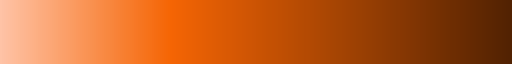

In [8]:
nw_cmap = sns.color_palette("blend:#ffc3a6,#FA9455,#F56504,#CC5404,#A44403,#7B3303,#522202", as_cmap=True)
nw_cmap

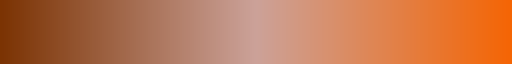

In [9]:
nw_cmap_heatmap = sns.color_palette("blend:#7B3303,#cca299,#f56504", as_cmap=True)
nw_cmap_heatmap

In [10]:
nw_cmap_heatmap_5 = sns.color_palette("blend:#7B3303,#cca299,#f56504",n_colors=5)
nw_cmap_heatmap_5

[(0.4823529411764706, 0.2, 0.011764705882352941),
 (0.6417993079584775, 0.4185005767012687, 0.3070357554786621),
 (0.8006305267204922, 0.6343560169165705, 0.5977085736255286),
 (0.8813379469434833, 0.5142791234140714, 0.30440599769319493),
 (0.9607843137254902, 0.396078431372549, 0.01568627450980392)]

In [11]:
nw_clr_single = '#f56504'
nw_clr_single_greyed = '#cca299'

In [12]:
sns.color_palette("blend:#f56504,#cca299", n_colors=2)

[(0.9607843137254902, 0.396078431372549, 0.01568627450980392),
 (0.8, 0.6352941176470588, 0.6)]

## Data Extraction & Cleaning

* Export members records with **/ExportGuildMemberList guild-member-list-281221.csv** command
<br></br>
* **/ExportGuildDonationLog** -- exports coffer donations
<br></br>
* default export directory *C:\Program Files (x86)\Steam\steamapps\common\Cryptic Studios\Neverwinter\Live\guild-member-list-281221.csv*

In [13]:
os.listdir('data')

['guild-member-list-281221-OUT.csv', 'guild-ranks.json']

In [14]:
file = os.path.join('data','guild-member-list-281221-OUT.csv')

In [15]:
pd.read_csv(file).shape

(334, 8)

In [16]:
_tmp = pd.read_csv(file)
_tmp.shape, _tmp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Character Name      334 non-null    object
 1   Account Handle      334 non-null    object
 2   Level               334 non-null    int64 
 3   Class               334 non-null    object
 4   Guild Rank          334 non-null    object
 5   Contribution Total  334 non-null    int64 
 6   Join Date           334 non-null    object
 7   Last Active Date    334 non-null    object
dtypes: int64(2), object(6)
memory usage: 126.6 KB


((334, 8), None)

In [21]:
_tmp.isna().sum()

Character Name        0
Account Handle        0
Level                 0
Class                 0
Guild Rank            0
Contribution Total    0
Join Date             0
Last Active Date      0
dtype: int64

In [33]:
# OUTPUT HIDDEN FOR CONFIDENTIALITY PURPOSES
_tmp.head(1);

In [34]:
del _tmp

### Variables description

- **Character Name** -- not unique - Name of the in-game character;
- **Account Handle** -- unique - Game account, can have multiple characters on it;
- **Level** -- 1-20 (nominal) -- Character level. Can be dropped, since guild is endgame focused, i.e. lvl 20 accounts only;
- **Class** -- 9 classes (cat. nominal) -- Character class (each has 2 subclases/roles, not provided in original file);
- **Guild Rank** -- 7 ranks (cat. ordinal) -- Character rank within guild. 1 = lowest rank. Single account might have characters with differrent ranks, (guild officer mistake) therefore max rank of character tied to account should be used;
- **Contribution Total** -- (num. discrete) -- Total contribution (donation) to guild coffer per character;
- **Join Date** -- datetime - Date and time a character accepted an invitation to guild. Some players might leave and get reinvited for various reasons, so this variable not reliable;
- **Last Active Date** -- datetime -- Last time a character logged into the game;

In [35]:
custom_date_parser = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S %p")

df_raw = pd.read_csv(
    file,
    usecols=[0,1,3,4,5,7],
    converters={
        'Last Active Date': custom_date_parser
    }
)

# MASKED FOR CONFIDENTIALITY PURPOSES
df_raw['Character Name'] = mask_column(df_raw['Character Name'])
df_raw['Account Handle'] = mask_column(df_raw['Account Handle'])
df_raw['Guild Rank'] = mask_guild_rank(df_raw['Guild Rank'])

df_raw.head()

,Character Name,Account Handle,Class,Guild Rank,Contribution Total,Last Active Date
0,wdSwoh,o9r2nornddr@cr,Rogue,6,485165,2021-12-28 09:50:03
1,krndRnednomRm,in@9niunn@4,Cleric,4,425840,2021-12-27 09:16:11
2,aDDa Be,e19eee1mobee,Barbarian,5,353118,2021-12-28 10:38:05
3,rnaVk rnknOV,robr@rbt,Rogue,5,230163,2021-12-23 11:53:50
4,Ihhtr'rrrII,sdneetdy@@ey,Fighter,7,191713,2021-09-29 05:00:40


In [20]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_raw, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
df_raw.columns = ['character','account','character_class','guild_rank','contribution','last_active_date']
df_raw.head(1)

,character,account,character_class,guild_rank,contribution,last_active_date
0,wdSwoh,o9r2nornddr@cr,Rogue,6,485165,2021-12-28 09:50:03


In [37]:
df_raw[df_raw == ''].count()

character           0
account             0
character_class     0
guild_rank          0
contribution        0
last_active_date    0
dtype: int64

### Additional transformations

Based on the last active date, another piece of information can be extracted, number of **inactive days**. 

In [38]:
_date = file.split('-')[-2]
_date

'281221'

In [39]:
# +1 day start from the next day
file_date = pd.to_datetime(_date) + pd.Timedelta(days=1)
file_date

Timestamp('2021-12-29 00:00:00')

In [40]:
df_raw['days_inactive'] = (file_date - df_raw['last_active_date']).dt.days

df_raw

,character,account,character_class,guild_rank,contribution,last_active_date,days_inactive
0,wdSwoh,o9r2nornddr@cr,Rogue,6,485165,2021-12-28 09:50:03,0
1,krndRnednomRm,in@9niunn@4,Cleric,4,425840,2021-12-27 09:16:11,1
2,aDDa Be,e19eee1mobee,Barbarian,5,353118,2021-12-28 10:38:05,0
3,rnaVk rnknOV,robr@rbt,Rogue,5,230163,2021-12-23 11:53:50,5
4,Ihhtr'rrrII,sdneetdy@@ey,Fighter,7,191713,2021-09-29 05:00:40,90
...,...,...,...,...,...,...,...
329,aG_es_see_iaDDua,pa77nha7,Barbarian,1,0,2021-11-25 09:10:39,33
330,rArrli,8@al#4ey134#,Wizard,4,0,2021-12-26 05:30:08,2
331,yaaya,cedeae,Paladin,5,0,2021-12-28 05:33:30,0
332,lheMiic,k000i0mi@@,Cleric,3,0,2021-12-28 12:38:49,0


# Exploratory Data Analysis (EDA)

In [26]:
from scipy import stats
import matplotlib.pyplot as plt

## Overview

In [41]:
df_guild = df_raw.copy()
df_guild.to_csv(os.path.join('data','guild-member-list-281221-clean.csv'), index=False)
df_guild.head()

,character,account,character_class,guild_rank,contribution,last_active_date,days_inactive
0,wdSwoh,o9r2nornddr@cr,Rogue,6,485165,2021-12-28 09:50:03,0
1,krndRnednomRm,in@9niunn@4,Cleric,4,425840,2021-12-27 09:16:11,1
2,aDDa Be,e19eee1mobee,Barbarian,5,353118,2021-12-28 10:38:05,0
3,rnaVk rnknOV,robr@rbt,Rogue,5,230163,2021-12-23 11:53:50,5
4,Ihhtr'rrrII,sdneetdy@@ey,Fighter,7,191713,2021-09-29 05:00:40,90


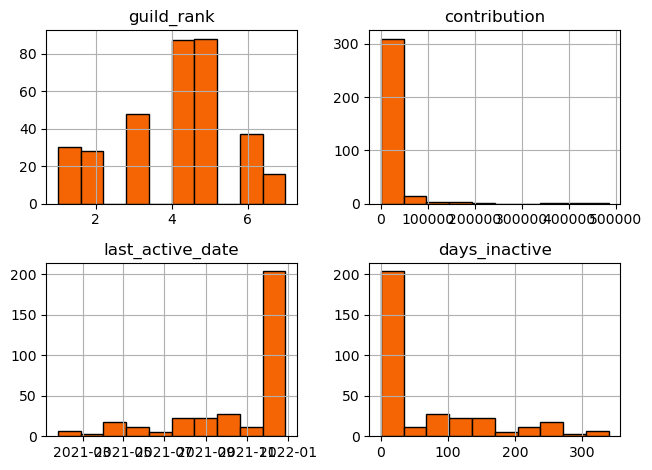

In [28]:
df_guild.hist(
    bins=10,
    layout=(-1,2),
    edgecolor="black",
    color=nw_clr_single
    )
plt.tight_layout()

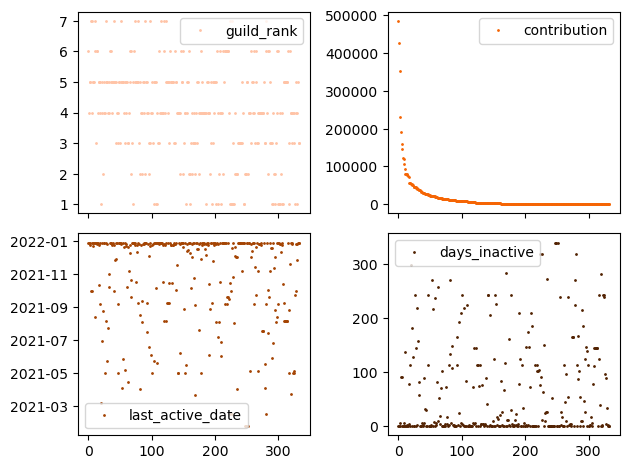

In [29]:
df_guild.plot(
    layout=(-1, 2),
    subplots=True,
    marker=".",
    markersize=2,
    lw=0,
    cmap=nw_cmap
)
plt.tight_layout()

In [30]:
df_guild.describe(percentiles=[.25, .5, .75, .9, .95, .99]).style.format(thousands=',', precision=0)

,guild_rank,contribution,last_active_date,days_inactive
count,334,334,334,334
mean,4,"15,625",2021-10-26 16:10:15.526946048,63
min,1,0,2021-01-23 01:48:03,0
25%,3,0,2021-09-07 07:36:59.500000,1
50%,4,"1,875",2021-12-23 10:54:16,5
75%,5,"11,080",2021-12-27 12:23:16.500000,112
90%,6,"37,610",2021-12-28 11:40:26.400000,218
95%,6,"61,467",2021-12-28 12:32:50.049999872,242
99%,7,"217,475",2021-12-28 12:46:25.380000,332
max,7,"485,165",2021-12-28 12:50:01,339


**From the quick overview above, we can see that:**
- Substantial amount, at least 25%, of characters haven't made any contributions as of today.
- Only around 1% of characters have extremly large total contribution, when compared to others.
- Roughly half of the character base in guild have less than 5 days of inactivity; i.e. approximately 50% of all characters can be seen online throughout a week.
- 1% of characters have not logged in (been used) for nearly a whole year.

## Accounts with Most Characters in the Guild

In [31]:
_acc_chars_count = (
    df_guild
    .groupby('account')
    .agg({'guild_rank':'max','character':'count'})
    .sort_values('character', ascending=False)
)

In [32]:
_acc_chars_count = (
    _acc_chars_count[_acc_chars_count['character'] > _acc_chars_count['character'].quantile(.9)]
    .rename(columns={'character':'characters'})
    .sort_values('guild_rank', ascending=True)
    .reset_index()
)
_acc_chars_count

,account,guild_rank,characters
0,1#22o3222h1@r,3,9
1,pycs@epaspalse,3,8
2,3rg@doopg@#r,4,10
3,1l71jt@0@@@71e,4,8
4,m@aa@aemma,5,10
5,@roo@s@b,5,9
6,e@@1ea,5,8
7,@exe@@orprrpro,5,8
8,tpa6@uotu,5,8
9,@@2@2#73ncr3o@,6,9


In [33]:
# Find max characters within each guild_rank
max_characters = _acc_chars_count.groupby('guild_rank')['characters'].transform('max')

# Create color list
_bar_colors = [(0.0,0.0,0.0,0.0) if char == max_characters[i] else 'white' for i,char in enumerate(_acc_chars_count['characters'])]

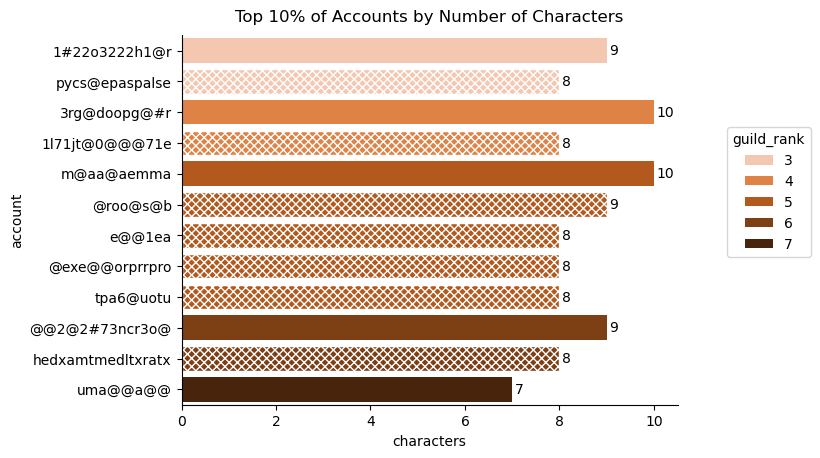

In [34]:
s = sns.barplot(
    data=_acc_chars_count,
    x='characters',
    y='account',
    hue='guild_rank',
    orient='h',
    palette=nw_cmap
)

for i,container in enumerate(s.containers):
    tmp_hue = _acc_chars_count.loc[_acc_chars_count['guild_rank']==container.get_label()]
    s.bar_label(container, labels=tmp_hue['characters'], padding=2, fmt='{:,.0f}')
    
for i,patch in enumerate(s.patches):
    if i < len(_bar_colors):
        patch.set_hatch('xxxx')
        patch.set_edgecolor(_bar_colors[i])

sns.move_legend(s, loc=(1.1, 0.4))

plt.title('Top 10% of Accounts by Number of Characters', pad=10)
sns.despine()

## Distribution of Classes in the Guild

In [35]:
_class_count = df_guild['character_class'].value_counts().reset_index()
_class_count

,character_class,count
0,Cleric,51
1,Wizard,46
2,Rogue,44
3,Barbarian,41
4,Warlock,38
5,Paladin,37
6,Fighter,35
7,Ranger,32
8,Bard,10


In [36]:
_colors = {}
for i,c in enumerate(_class_count['character_class']):
    if _class_count.loc[i,'count']==_class_count['count'].max() or _class_count.loc[i,'count']==_class_count['count'].min():
        _colors[c]=nw_clr_single
    else:
        _colors[c]=nw_clr_single_greyed

_colors

{'Cleric': '#f56504',
 'Wizard': '#cca299',
 'Rogue': '#cca299',
 'Barbarian': '#cca299',
 'Warlock': '#cca299',
 'Paladin': '#cca299',
 'Fighter': '#cca299',
 'Ranger': '#cca299',
 'Bard': '#f56504'}

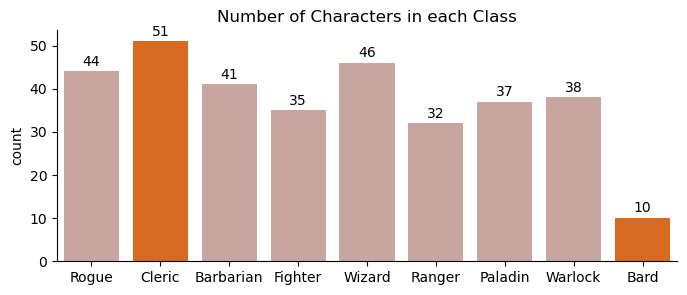

In [37]:
plt.figure(figsize=(8, 3))
s = sns.countplot(x='character_class', data=df_guild, palette=_colors)

for container in s.containers:
    tmp_hue = _class_count.loc[_class_count['character_class']==container.get_label()]
    s.bar_label(container, labels=tmp_hue['count'], padding=2, fmt='{:,.0f}')
    
plt.title('Number of Characters in each Class');
plt.xlabel('')
sns.despine()

## Accounts with the Largest Total Contribution

In [38]:
_acc_contrib = df_guild.groupby(['account']).agg({'guild_rank':'max','contribution':'sum'}).sort_values('contribution',ascending=False)

_acc_contrib = _acc_contrib[_acc_contrib['contribution'] > _acc_contrib['contribution'].quantile(.9)].reset_index()
_acc_contrib

,account,guild_rank,contribution
0,ni49an@n9@n,4,572554
1,@@2@2#73ncr3o@,6,509316
2,@roo@s@b,5,374422
3,ome@1@9eram6,5,353118
4,hiyieeeih@eh,7,246533
5,y@@uu,7,186810
6,tpa6@uotu,5,158234
7,uma@@a@@,7,156128
8,llasjlooj@,5,122941
9,nii@tttdhgtm,5,121769


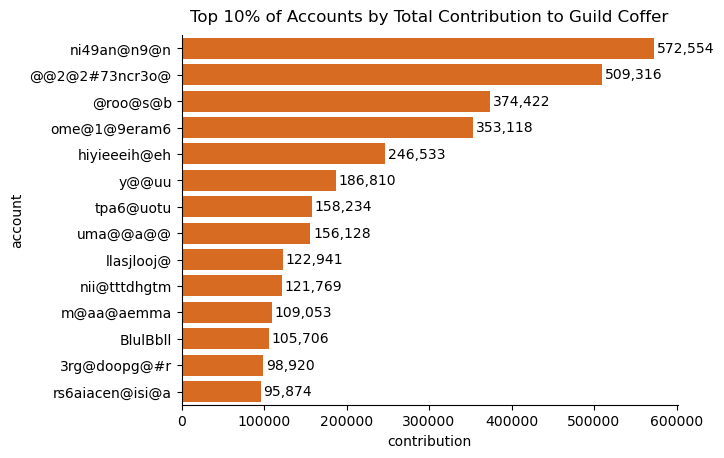

In [39]:
s = sns.barplot(
    data=_acc_contrib,
    x='contribution',
    y='account',
    orient='h',
    color=nw_clr_single
)
s.bar_label(s.containers[0],padding=2, fmt='{:,.0f}')
plt.title('Top 10% of Accounts by Total Contribution to Guild Coffer', pad=10)
sns.despine()

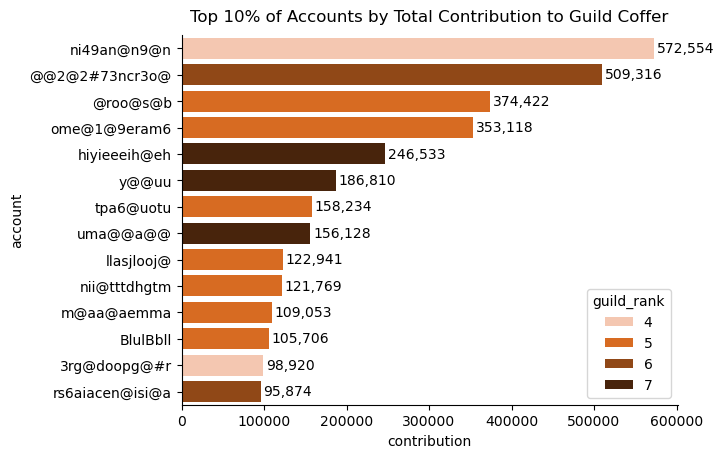

In [40]:
s = sns.barplot(
    data=_acc_contrib,
    x='contribution',
    y='account',
    hue='guild_rank',
    orient='h',
    palette=nw_cmap
)

for container in s.containers:
    tmp_hue = _acc_contrib.loc[_acc_contrib['guild_rank']==container.get_label()]
    s.bar_label(container, labels=tmp_hue['contribution'], padding=2, fmt='{:,.0f}')
    
plt.title('Top 10% of Accounts by Total Contribution to Guild Coffer', pad=10)
sns.despine()

## New Members with Non-Zero Contribution

- **New Members** = accounts with the maximum character Guild Rank equal to 1 

In [41]:
_new_member = (df_guild.groupby('account')['guild_rank'].max()==1).reset_index()
_new_member = (_new_member[_new_member['guild_rank']==True]['account']).values
_new_member

array(['#79#lg7g9@sggi9dn', '#@9@0xn99sx33', '#co0oroood#dl#l',
       '#t@ia823h@m3i2aatp3', '41c1488r41om11o@0', '6x@##8x@amo60w#',
       '72sa@#ns@8179nanna', '7@tp@an@', '9t7efww35@@ftwi9',
       '@cainu@ooaig1o@a', '@nun@u', '@tugblebhea@h@kb', 'a4#nzuaunkiik',
       'bhu5uku@hb5#', 'e@eye@fatntfrtee', 'gsoh@s@m', 'i5so9d0#@md0ns7',
       'knu@2n2e@or6kko6e', 'leel9u9e9ls', 'lgrllrgeoknle@',
       'm#1m515mz50@5', 'taa9dct@catl'], dtype=object)

In [42]:
_new_contrib = (
    df_guild[df_guild['account']
    .isin(_new_member)]
    .groupby('account')['contribution']
    .sum()
    .sort_values(ascending=False)
)
_new_contrib = _new_contrib[_new_contrib != 0].reset_index()
_new_contrib

,account,contribution
0,taa9dct@catl,53966
1,#@9@0xn99sx33,15098
2,i5so9d0#@md0ns7,7580
3,#co0oroood#dl#l,7479
4,m#1m515mz50@5,2683
5,e@eye@fatntfrtee,2249
6,bhu5uku@hb5#,616
7,#79#lg7g9@sggi9dn,190
8,@tugblebhea@h@kb,144


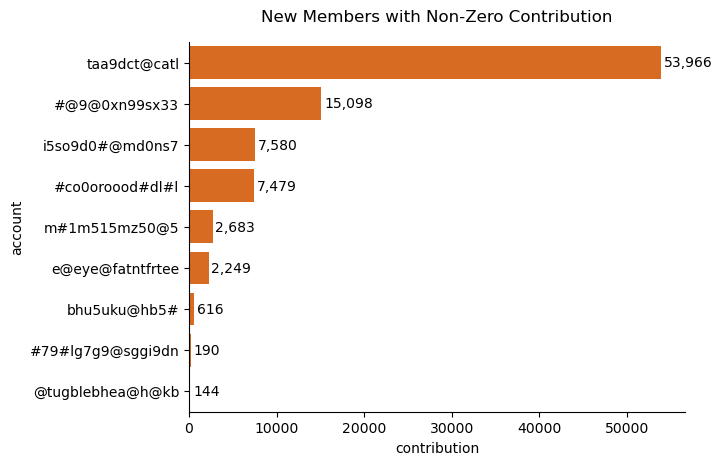

In [43]:
s = sns.barplot(data=_new_contrib, x='contribution', y='account', color=nw_clr_single)
s.bar_label(s.containers[0],padding=2, fmt='{:,.0f}')
plt.title('New Members with Non-Zero Contribution', pad=15)
sns.despine()

In [44]:
a = pd.DataFrame({'account':_new_member, 'contribution':'zero'})
b = pd.DataFrame({'account':_new_contrib['account'].values, 'contribution':'non-zero'})

In [45]:
_new_contrib_poportions = pd.concat([a,b])
_new_contrib_poportions.sample(5)

,account,contribution
4,41c1488r41om11o@0,zero
11,@tugblebhea@h@kb,zero
15,gsoh@s@m,zero
5,6x@##8x@amo60w#,zero
6,72sa@#ns@8179nanna,zero


In [46]:
_new_contrib_poportions= (
    _new_contrib_poportions
    .groupby('contribution')
    .count()
    .sort_values(by='contribution',ascending=False)
    .reset_index()
)
_new_contrib_poportions

,contribution,account
0,zero,22
1,non-zero,9


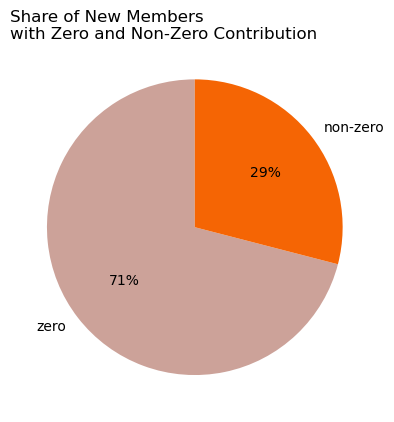

In [47]:
plt.pie(
    _new_contrib_poportions['account'],
    startangle=90,
    autopct="%.0f%%",
    colors=[nw_clr_single_greyed,nw_clr_single],
    labels=_new_contrib_poportions['contribution'],
)

plt.title('Share of New Members\nwith Zero and Non-Zero Contribution', pad=0, loc='left');

## Old Members with low Contribution

- **Old Members** = accounts with maximum character Guild Rank equal to 4 
- **low** (for old members only) = equal to or lower than median of the Guild Rank 1 players total Contribution

In [48]:
_old_member = (df_guild.groupby('account')['guild_rank'].max()>=4).reset_index()
_old_member = (_old_member[_old_member['guild_rank']==True]['account']).values
_old_member

array(['#i#5nas#6n6t5', '#t@sso3@0@oo', '0a9dcdaa09@ca#',
       '0nei0@900#oc92c', '1@la#@ee8@ll', '1l71jt@0@@@71e',
       '3rg@doopg@#r', '7e82#6aegese6e', '9171onby97@9e7nyoen',
       '@6soo24#i78ojj', '@@2@2#73ncr3o@', '@@@hldbhlkh', '@@el@ccdl',
       '@emnnn3n8#8nm', '@exe@@orprrpro', '@ikeelkek', '@oBb7bB9l@lb#@',
       '@roo@s@b', 'BlulBbll', 'a#0l00ia#@2l44', 'a@berrrdbann@',
       'aaoorga@', 'ai2piza@i', 'akkkyckr', 'anamnnunmuman',
       'aunnnaceelcce', 'azz0a2@2z', 'cagga4@ckkk4a@', 'chh7ssisi',
       'd@1d@dre', 'e@@1ea', 'eddnieadn@na', 'elhw@hhheei',
       'emwoellc@1oo9l9ee', 'etii#1t@e60de#6', 'g2aol#57og7n2a3w2gd',
       'h@rr@th@9000', 'hedxamtmedltxratx', 'hiyieeeih@eh', 'iasgp455ggg',
       'izl@iszsl@lil', 'kheyhny@ej', 'llasjlooj@', 'llecmddmiiarppee',
       'm@aa@aemma', 'mesmtrmrwmrewae', 'mhabchahhbn', 'n@a7nn',
       'nfndwndf6f', 'nh#2y3n#2on@', 'ni49an@n9@n', 'nii@tttdhgtm',
       'ns@ssolsu', 'o70gl3#o77077#', 'ocproopepr', 'ome@1@9eram6',
 

In [178]:
# Aggregate accounts that are considered 'old'
_old_contrib = (
    df_guild[df_guild['account']
    .isin(_old_member)]
    .groupby('account')
    .agg({'guild_rank':'max', 'contribution':'sum'})
    .reset_index()
)
_old_contrib

,account,guild_rank,contribution
0,#i#5nas#6n6t5,5,56408
1,#t@sso3@0@oo,4,38683
2,0a9dcdaa09@ca#,4,19452
3,0nei0@900#oc92c,4,1130
4,1@la#@ee8@ll,4,9370
...,...,...,...
63,u@bell@bndl,5,26569
64,uma@@a@@,7,156128
65,xae@rxexmeeextx,4,11325
66,y@@uu,7,186810


In [179]:
# Filter old accounts that have low-to-none contribution
_old_contrib_low = (
    _old_contrib[_old_contrib['contribution'] <= _new_contrib['contribution'].median()]
    .sort_values('guild_rank',ascending=False)
    .reset_index(drop=True)
)
_old_contrib_low

,account,guild_rank,contribution
0,kheyhny@ej,5,0
1,ns@ssolsu,5,0
2,r@nls@aeaso,5,900
3,ssgimmegd@tdmt,5,1534
4,0nei0@900#oc92c,4,1130
5,ai2piza@i,4,972
6,g2aol#57og7n2a3w2gd,4,1942
7,o70gl3#o77077#,4,0
8,rneer1s1rt3ir,4,624


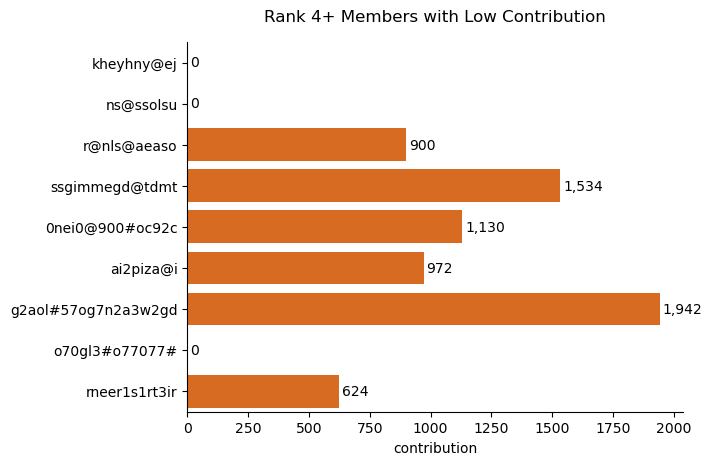

In [180]:
s = sns.barplot(
    data=_old_contrib_low,
    x='contribution',
    y='account',
    orient='h',
    color=nw_clr_single
)

s.bar_label(s.containers[0], padding=2, fmt='{:,.0f}')

plt.title('Rank 4+ Members with Low Contribution', pad=15)
s.set_ylabel('')
sns.despine()

## Contribution (Coffer Donations)

In [52]:
df_guild['account'].nunique()

136

In [53]:
df_guild['contribution'].describe()

count      334.00000
mean     15624.63174
std      47331.59043
min          0.00000
25%          0.00000
50%       1875.00000
75%      11080.00000
max     485165.00000
Name: contribution, dtype: float64

In [54]:
df_guild['contribution'].describe([.75,.80,.85,.90,.95,.99,.999])

count      334.00000
mean     15624.63174
std      47331.59043
min          0.00000
50%       1875.00000
75%      11080.00000
80%      16891.60000
85%      23016.60000
90%      37609.70000
95%      61466.90000
99%     217474.50000
99.9%   465409.77500
max     485165.00000
Name: contribution, dtype: float64

In [55]:
_contrib_outliers = df_guild.groupby('account')['contribution'].sum().reset_index()
_contrib_outliers_acc = _contrib_outliers[_contrib_outliers['contribution'] >= _contrib_outliers['contribution'].quantile(.95)]['account'].values
_contrib_outliers_acc

array(['@@2@2#73ncr3o@', '@roo@s@b', 'hiyieeeih@eh', 'ni49an@n9@n',
       'ome@1@9eram6', 'tpa6@uotu', 'y@@uu'], dtype=object)

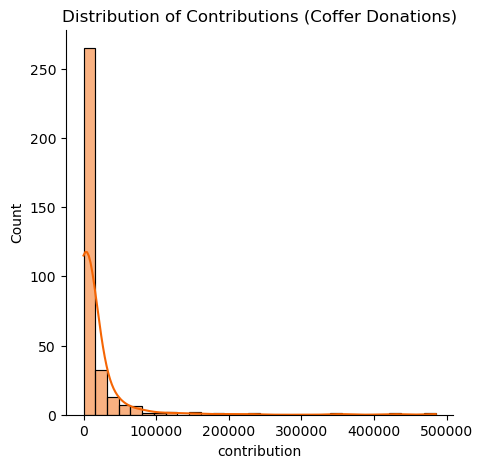

In [56]:
plt.figure(figsize=(5, 5))
sns.histplot(df_guild['contribution'], bins=30, kde=True, color=nw_clr_single)
plt.title('Distribution of Contributions (Coffer Donations)')
sns.despine()

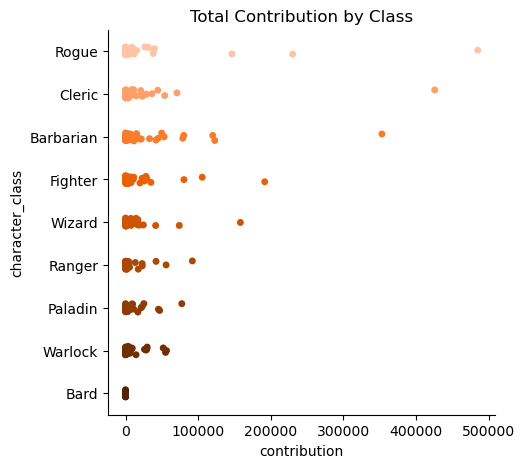

In [57]:
plt.figure(figsize=(5, 5))
sns.stripplot(y='character_class', x='contribution', data=df_guild, hue='character_class', jitter=True, palette=nw_palette)
plt.title('Total Contribution by Class')
sns.despine()

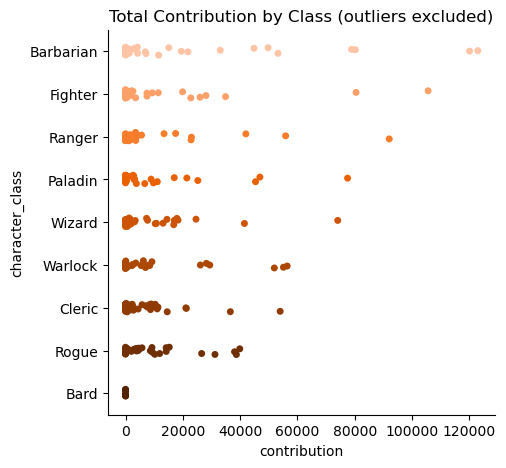

In [58]:
plt.figure(figsize=(5, 5))
sns.stripplot(y='character_class', x='contribution', data=df_guild[~df_guild['account'].isin(_contrib_outliers_acc)], hue='character_class', jitter=True, palette=nw_palette)
plt.title('Total Contribution by Class (outliers excluded)')
sns.despine()

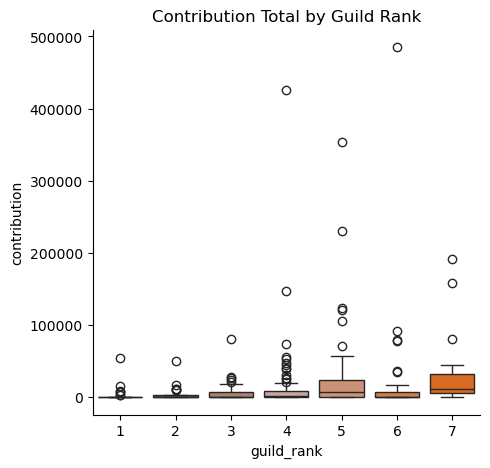

In [59]:
plt.figure(figsize=(5, 5))
sns.boxplot(
    x='guild_rank',
    y='contribution',
    data=df_guild,
    hue='guild_rank',
    legend=False,
    palette=nw_cmap_heatmap
)
plt.title('Contribution Total by Guild Rank')
sns.despine()

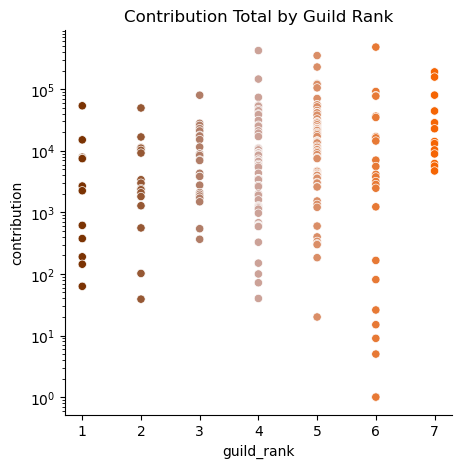

In [60]:
plt.figure(figsize=(5, 5))
sns.scatterplot(
    x='guild_rank',
    y='contribution',
    data=df_guild,
    hue='guild_rank',
    legend=False,
    palette=nw_cmap_heatmap
)
plt.yscale('log')
plt.title('Contribution Total by Guild Rank')
sns.despine()

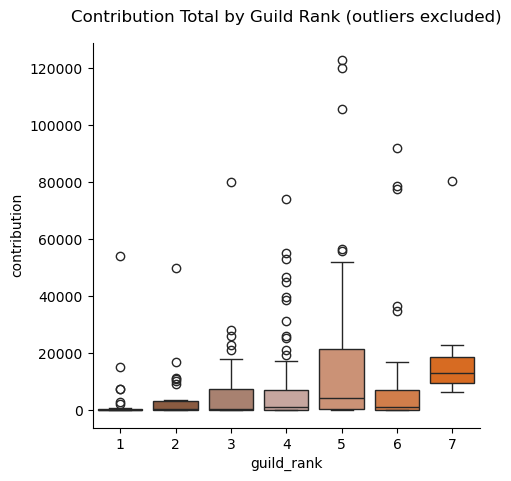

In [61]:
plt.figure(figsize=(5, 5))
sns.boxplot(
    x='guild_rank',
    y='contribution',
    data=df_guild[~df_guild['account'].isin(_contrib_outliers_acc)],
    hue='guild_rank',
    legend=False,
    palette=nw_cmap_heatmap
)
plt.title('Contribution Total by Guild Rank (outliers excluded)', pad=15)
sns.despine()

In [62]:
_var_contrib = df_guild.groupby(['guild_rank']).agg({'contribution':stats.iqr}).rename(columns={'contribution':'iqr'}).reset_index()
_var_contrib

,guild_rank,iqr
0,1,556.00000
1,2,3091.25000
2,3,7463.00000
3,4,7913.00000
4,5,22635.25000
5,6,7067.00000
6,7,27184.50000


In [63]:
_rank_contrib = (df_guild
 .groupby(['account'])
 .agg({
     'guild_rank':'max',
     'contribution':'sum'
 })
 .sort_values('guild_rank', ascending=False)
 .reset_index()
).groupby('guild_rank')['contribution'].sum().reset_index()

_rank_contrib

,guild_rank,contribution
0,1,90005
1,2,124196
2,3,307099
3,4,1207003
4,5,2009587
5,6,891266
6,7,589471


In [64]:
_rank_contrib = _rank_contrib.merge(_var_contrib, on='guild_rank')
_rank_contrib

,guild_rank,contribution,iqr
0,1,90005,556.00000
1,2,124196,3091.25000
2,3,307099,7463.00000
3,4,1207003,7913.00000
4,5,2009587,22635.25000
5,6,891266,7067.00000
6,7,589471,27184.50000


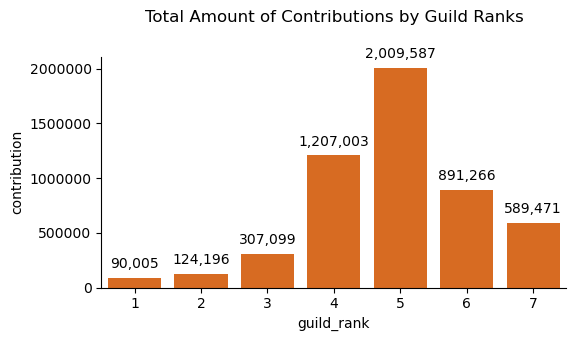

In [65]:
plt.figure(figsize=(6, 3))
s = sns.barplot(
    x='guild_rank',
    y='contribution',
    data=_rank_contrib,
    color=nw_clr_single
)
s.bar_label(s.containers[0], fmt='{:,.0f}', padding=5)

plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Amount of Contributions by Guild Ranks', pad=25)
sns.despine()

In [66]:
_colors = {}
for i,c in enumerate(_rank_contrib['guild_rank']):
    if _rank_contrib.loc[i,'contribution']==_rank_contrib['contribution'].max():
        _colors[c]=nw_clr_single
    else:
        _colors[c]=nw_clr_single_greyed

_colors

{1: '#cca299',
 2: '#cca299',
 3: '#cca299',
 4: '#cca299',
 5: '#f56504',
 6: '#cca299',
 7: '#cca299'}

In [67]:
import matplotlib.ticker as ticker

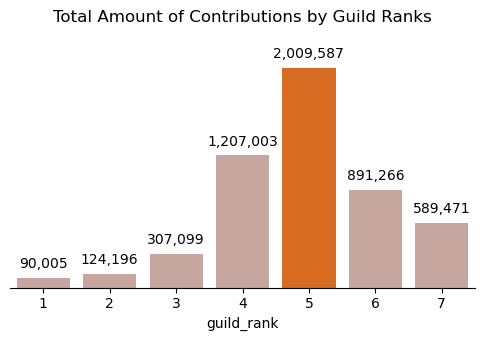

In [68]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(
    ax=ax,
    x='guild_rank',
    y='contribution',
    data=_rank_contrib,
    hue='guild_rank',
    palette=_colors,
    legend=False
)

for container in s.containers:
    tmp_hue = _rank_contrib.loc[_rank_contrib['guild_rank']==container.get_label()]
    ax.bar_label(container, labels=tmp_hue['contribution'], padding=5, fmt='{:,.0f}')

ax.set(ylabel=None, yticks=[])

plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Amount of Contributions by Guild Ranks', pad=25)
sns.despine(left=True)

## Inactive Accounts

In [69]:
_acc_inact = (
    df_guild
    .groupby('account')
    .agg({
        'guild_rank':'max',
        'days_inactive':'min'
    })
    .sort_values(
        by=['guild_rank','days_inactive'], 
        ascending=[True, False]
    )
)
_acc_inact = _acc_inact[_acc_inact['days_inactive'] > _acc_inact['days_inactive'].quantile(.9)].reset_index()
_acc_inact

,account,guild_rank,days_inactive
0,taa9dct@catl,1,297
1,m#1m515mz50@5,1,226
2,#co0oroood#dl#l,1,223
3,6x@##8x@amo60w#,1,214
4,otmxeix3#6nn@o3@kin3,2,271
5,a1i1o1oc3a#n3nc1a,2,270
6,spparosra,2,205
7,ttWhhWt,3,282
8,u6zlll6l@4,3,257
9,u@an8m8@m,3,238


<Axes: >

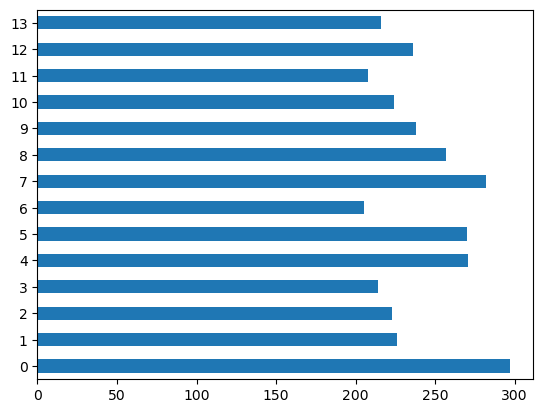

In [70]:
_acc_inact['days_inactive'].plot(kind='barh')

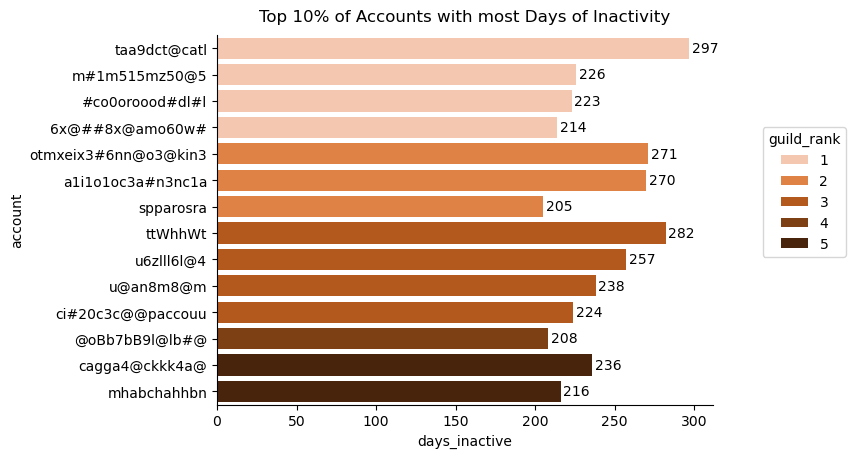

In [71]:
s = sns.barplot(
    data=_acc_inact,
    x='days_inactive',
    y='account',
    orient='h',
    hue='guild_rank',
    palette=nw_cmap
)

sns.move_legend(s,loc=(1.1, 0.4))

for container in s.containers:
    tmp_hue = _acc_inact.loc[_acc_inact['guild_rank']==container.get_label()]
    s.bar_label(container, labels=tmp_hue['days_inactive'], padding=2, fmt='{:,.0f}')
    
plt.title('Top 10% of Accounts with most Days of Inactivity', pad=10)
sns.despine()

## Popular Classes

My **Definition of Popular Class**

A "Popular Class" is determined by its activity and contribution within the game, specifically by the **popularity score**, which is calculated for each class by combining three normalized factors:
- number of characters
- contribution
- days of inactivity

The normalized popularity score I used here is calculated using the following two-step process:

$$
\begin{aligned}
\text{PS}_{c,r} &= 0.45 \cdot \frac{n_{c,r}}{N_r} + 0.45 \cdot \text{norm}_r(C_{c,r}) - 0.1 \cdot \text{norm}_r(I_{c,r}) \\[10pt]
\text{NPS}_{c,r} &= \frac{\text{PS}_{c,r} - \min_c(\text{PS}_{c,r})}{\max_c(\text{PS}_{c,r}) - \min_c(\text{PS}_{c,r})}
\end{aligned}
$$

- $\text{PS}_{c,r}$ is the Popularity Score
- $\text{NPS}_{c,r}$ is the Normalized Popularity Score for class $c$ in rank $r$
- $n_{c,r}$ is the number of characters of class $c$ in rank $r$
- $N_r$ is the total number of characters in rank $r$
- $C_{c,r}$ is the contribution of class $c$ in rank $r$
- $I_{c,r}$ is the inactivity (days inactive) of class $c$ in rank $r$
- $\text{norm}_r()$ is the normalization function applied within rank $r$

*P.S. The inactivity penalty was first set to 0.2, but then i decided it was too harsh, so 10% was chosen instead. Short-term inactivity shouldn't heavily penalize otherwise active and contributing classes.*

Additional Info: The process gives equal positive weight (45% ~40%~ each) to the number of characters and their contribution, while applying a negative weight (10% ~20%~) to inactivity. 

This creates a balanced metric where classes with more active and contributing members score higher, while those with longer periods of inactivity are penalized. The score is normalized within each guild rank, allowing for fair comparisons across different ranks and character classes.

In [72]:
_popular_classes = (
    df_guild
    .groupby(['guild_rank','character_class'])
    .agg({
        'days_inactive':lambda x: np.ceil(np.median(x)),
        'contribution':'median',
        'character':'count'
    })
    .rename(columns={'character':'characters'})
    .reset_index()
)
_popular_classes.head(10)

,guild_rank,character_class,days_inactive,contribution,characters
0,1,Barbarian,33.00000,0.00000,5
1,1,Bard,2.00000,0.00000,1
2,1,Cleric,129.00000,283.00000,6
3,1,Fighter,174.00000,144.00000,5
4,1,Paladin,38.00000,0.00000,2
5,1,Ranger,11.00000,0.00000,3
6,1,Rogue,77.00000,0.00000,3
7,1,Warlock,1.00000,1124.50000,2
8,1,Wizard,149.00000,63.00000,3
9,2,Barbarian,137.00000,956.50000,4


In [73]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

In [74]:
# Calculate the proportion of each class within its rank
_popular_classes['class_proportion'] = _popular_classes.groupby('guild_rank')['characters'].transform(lambda x: x / x.sum())

# Normalize contribution and days_inactive
_popular_classes['norm_contribution'] = _popular_classes.groupby('guild_rank')['contribution'].transform(normalize)
_popular_classes['norm_days_inactive'] = _popular_classes.groupby('guild_rank')['days_inactive'].transform(normalize)

_popular_classes.head(1)

,guild_rank,character_class,days_inactive,contribution,characters,class_proportion,norm_contribution,norm_days_inactive
0,1,Barbarian,33.00000,0.00000,5,0.16667,0.00000,0.18497


In [75]:
# Calculate the popularity score
_popular_classes['popularity_score'] = (
    _popular_classes['class_proportion'] * 0.45 +
    _popular_classes['norm_contribution'] * 0.45 -
    _popular_classes['norm_days_inactive'] * 0.1
)

_popular_classes.head(1)

,guild_rank,character_class,days_inactive,contribution,characters,class_proportion,norm_contribution,norm_days_inactive,popularity_score
0,1,Barbarian,33.00000,0.00000,5,0.16667,0.00000,0.18497,0.05650


In [76]:
# Normalize the popularity score within each rank
_popular_classes['normalized_popularity_score'] = _popular_classes.groupby('guild_rank')['popularity_score'].transform(normalize)
_popular_classes.head(1)

,guild_rank,character_class,days_inactive,contribution,characters,class_proportion,norm_contribution,norm_days_inactive,popularity_score,normalized_popularity_score
0,1,Barbarian,33.00000,0.00000,5,0.16667,0.00000,0.18497,0.05650,0.14503


### Visualization

In [77]:
NPS = _popular_classes.pivot(index='character_class', columns='guild_rank', values='normalized_popularity_score').fillna(0)
NPS

guild_rank,1,2,3,4,5,6,7
character_class,,,,,,,
Barbarian,0.14503,0.10969,0.18832,0.34117,1.00000,1.00000,0.00000
Bard,0.06008,0.00000,0.09065,0.08800,0.00000,0.00000,0.00000
Cleric,0.29192,0.27066,0.00000,0.55801,0.16132,0.21306,0.28456
Fighter,0.09683,0.00000,1.00000,0.19393,0.25366,0.09171,1.00000
Paladin,0.04835,0.11651,0.16121,0.14692,0.15080,0.52708,0.15198
Ranger,0.11014,0.12552,0.49552,0.14203,0.30601,0.35202,0.24501
Rogue,0.03312,1.00000,0.24500,1.00000,0.13063,0.20310,0.00000
Warlock,1.00000,0.10717,0.47706,0.00000,0.53805,0.18900,0.09818
Wizard,0.00000,0.17575,0.09393,0.39348,0.26159,0.13467,0.16676


In [78]:
NPS.describe([.5,.75,.8,.9,.95,.99,.999])

guild_rank,1,2,3,4,5,6,7
count,9.00000,9.00000,9.00000,9.00000,9.00000,9.00000,9.00000
mean,0.19839,0.21170,0.30574,0.31817,0.31134,0.30118,0.21628
std,0.31237,0.30693,0.31031,0.30794,0.29777,0.30295,0.31236
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,0.09683,0.11651,0.18832,0.19393,0.25366,0.20310,0.15198
75%,0.14503,0.17575,0.47706,0.39348,0.30601,0.35202,0.24501
80%,0.20379,0.21372,0.48444,0.45929,0.39883,0.42204,0.26083
90%,0.43354,0.41653,0.59641,0.64641,0.63044,0.62167,0.42765
95%,0.71677,0.70826,0.79821,0.82320,0.81522,0.81083,0.71382
99%,0.94335,0.94165,0.95964,0.96464,0.96304,0.96217,0.94276


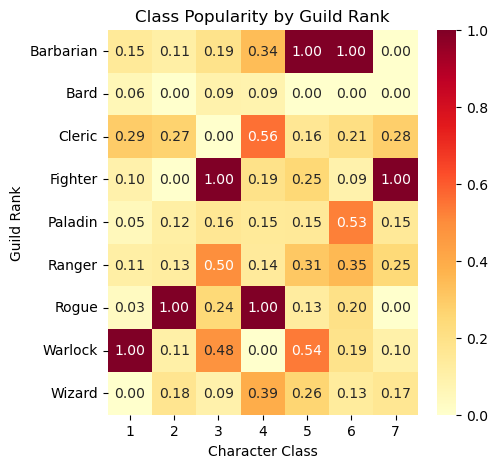

In [79]:
plt.figure(figsize=(5, 5))
sns.heatmap(NPS, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Class Popularity by Guild Rank')
plt.ylabel('Guild Rank')
plt.xlabel('Character Class')
plt.show()

In [80]:
high_popularity = 0.3
low_popularity = 0

In [81]:
labels_score = np.where(NPS >= high_popularity, "High",
                        np.where(NPS <= low_popularity, "Low", ""))
labels_score

array([['', '', '', 'High', 'High', 'High', 'Low'],
       ['', 'Low', '', '', 'Low', 'Low', 'Low'],
       ['', '', 'Low', 'High', '', '', ''],
       ['', 'Low', 'High', '', '', '', 'High'],
       ['', '', '', '', '', 'High', ''],
       ['', '', 'High', '', 'High', 'High', ''],
       ['', 'High', '', 'High', '', '', 'Low'],
       ['High', '', 'High', 'Low', 'High', '', ''],
       ['Low', '', '', 'High', '', '', '']], dtype='<U4')

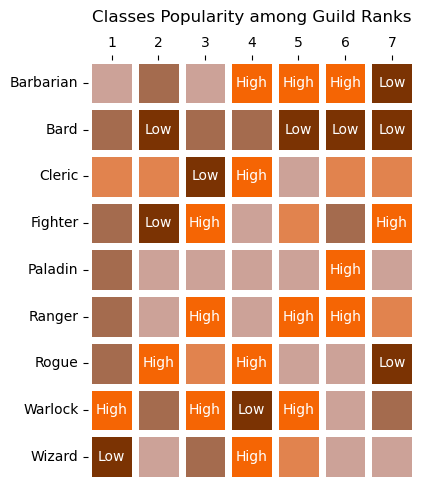

In [82]:
fig,ax = plt.subplots(figsize=(5,5))

sns.heatmap(
    NPS,
    annot=labels_score,
    square=True,
    fmt='',
    cmap=nw_cmap_heatmap_5,
    vmin=low_popularity-0.075,
    vmax=high_popularity+0.1,
    cbar=False,
    linewidths=5,
    ax=ax
)
ax.xaxis.tick_top()
ax.set(xlabel="", ylabel="")
ax.set_title('Classes Popularity among Guild Ranks',pad=10)

plt.tight_layout()

In [83]:
_M_char_qty = _popular_classes.pivot(index='character_class',columns='guild_rank', values='characters').fillna(0).astype(int)
_M_char_qty

guild_rank,1,2,3,4,5,6,7
character_class,,,,,,,
Barbarian,5,4,7,11,10,4,0
Bard,1,0,2,3,1,3,0
Cleric,6,7,8,13,9,5,3
Fighter,5,2,4,7,11,4,2
Paladin,2,3,5,9,11,6,1
Ranger,3,3,7,8,6,4,1
Rogue,3,1,6,13,15,4,2
Warlock,2,4,4,12,11,3,2
Wizard,3,4,5,11,14,4,5


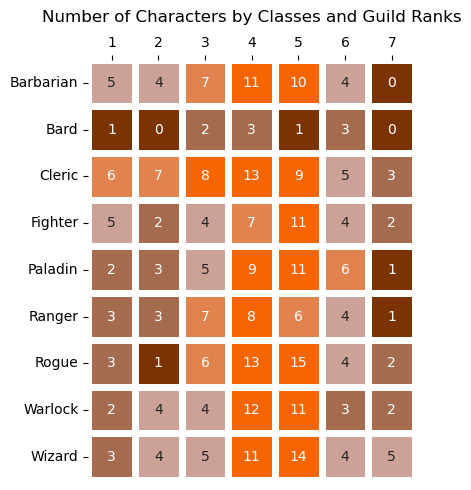

In [84]:
fig,ax = plt.subplots(figsize=(5,5))

sns.heatmap(
    _M_char_qty,
    annot=_M_char_qty,
    square=True,
    cmap=nw_cmap_heatmap_5,
    vmin=0,
    vmax=10,
    cbar=False,
    linewidths=5,
    ax=ax
)
ax.xaxis.tick_top()
ax.set(xlabel="", ylabel="")
ax.set_title('Number of Characters by Classes and Guild Ranks',pad=10)

plt.tight_layout()

## Guild Ranks

In [86]:
df_guild.head(1)

,character,account,character_class,guild_rank,contribution,last_active_date,days_inactive
0,oSwowo,@@2@2#73ncr3o@,Rogue,6,485165,2021-12-28 09:50:03,0


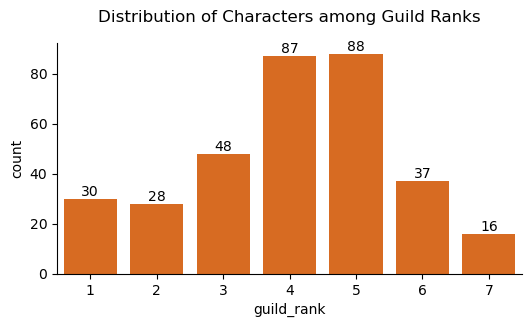

In [87]:
plt.figure(figsize=(6, 3))
s = sns.countplot(
    x='guild_rank',
    data=df_guild,
    order=sorted(df_guild['guild_rank'].unique()),
    color=nw_clr_single
)
s.bar_label(s.containers[0])
plt.title('Distribution of Characters among Guild Ranks', pad=15)
sns.despine()

In [88]:
_accounts = df_guild.groupby('guild_rank')['account'].nunique().reset_index()
_accounts

,guild_rank,account
0,1,27
1,2,20
2,3,27
3,4,31
4,5,29
5,6,8
6,7,3


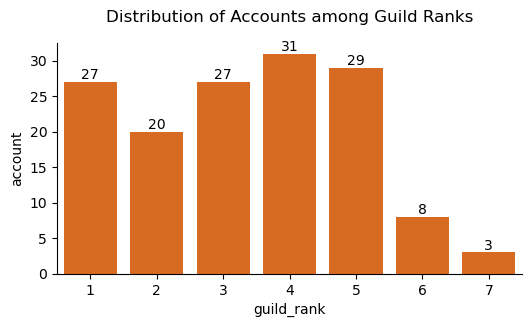

In [89]:
plt.figure(figsize=(6, 3))
s = sns.barplot(x='guild_rank', y='account', data=_accounts, color=nw_clr_single)
s.bar_label(s.containers[0])
plt.title('Distribution of Accounts among Guild Ranks', pad=15);
sns.despine()

In [90]:
_accounts = df_guild.groupby('account')['guild_rank'].max().reset_index().groupby('guild_rank')['account'].count().reset_index()
_accounts

,guild_rank,account
0,1,22
1,2,19
2,3,27
3,4,28
4,5,29
5,6,8
6,7,3


In [91]:
# Total accounts (~players) in guild
_accounts['account'].sum()

136

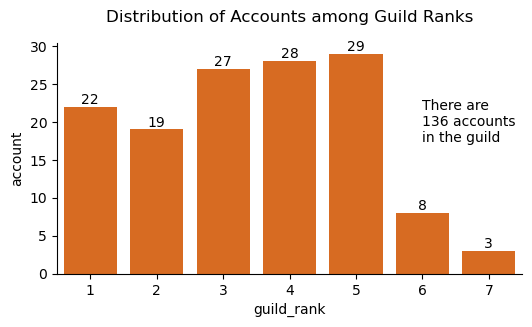

In [92]:
plt.figure(figsize=(6, 3))
s = sns.barplot(x='guild_rank', y='account', data=_accounts, color=nw_clr_single)
s.bar_label(s.containers[0])
plt.text(x=5,y=20,va='center', ha='left', s=f"There are\n{_accounts['account'].sum()} accounts\nin the guild")
plt.title('Distribution of Accounts among Guild Ranks', pad=15);
sns.despine()

# TimeSeries Analysis (basic)

## Guild Activity

In [93]:
_activity_time = df_guild.groupby(['character','guild_rank','character_class'])['days_inactive'].sum().reset_index()
_activity_time.head(1)

,character,guild_rank,character_class,days_inactive
0,zae r Yz ee,4,Rogue,0


In [94]:
activity_matrix = _activity_time.pivot_table(index='character_class', columns='days_inactive', values='character', aggfunc='count').iloc[:,1:]
activity_matrix

days_inactive,1,2,3,4,5,6,8,9,11,12,14,16,17,19,20,22,25,26,30,31,33,34,39,41,45,46,52,53,58,63,66,70,73,74,75,77,78,82,83,84,87,88,89,90,97,101,104,108,111,112,113,116,123,124,127,134,137,138,144,146,147,149,157,161,164,165,166,174,181,184,185,193,205,208,209,214,216,219,223,224,226,236,238,242,257,269,270,271,280,282,297,317,339
character_class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Barbarian,4.00000,6.00000,NaN,1.00000,1.00000,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bard,3.00000,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cleric,6.00000,3.00000,NaN,3.00000,1.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,1.00000,NaN,1.00000,NaN,2.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,2.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,1.00000
Fighter,4.00000,1.00000,1.00000,NaN,1.00000,NaN,NaN,2.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,1.00000,1.00000,2.00000,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,1.00000,NaN,NaN,1.00000,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000
Paladin,6.00000,1.00000,2.00000,2.00000,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000
Ranger,3.00000,3.00000,1.00000,2.00000,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN
Rogue,5.00000,4.00000,NaN,1.00000,2.00000,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,NaN,NaN,NaN,2.00000,NaN,1.00000,1.00000,NaN,1.00000,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN
Warlock,2.00000,4.00000,NaN,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,2.00000,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,2.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

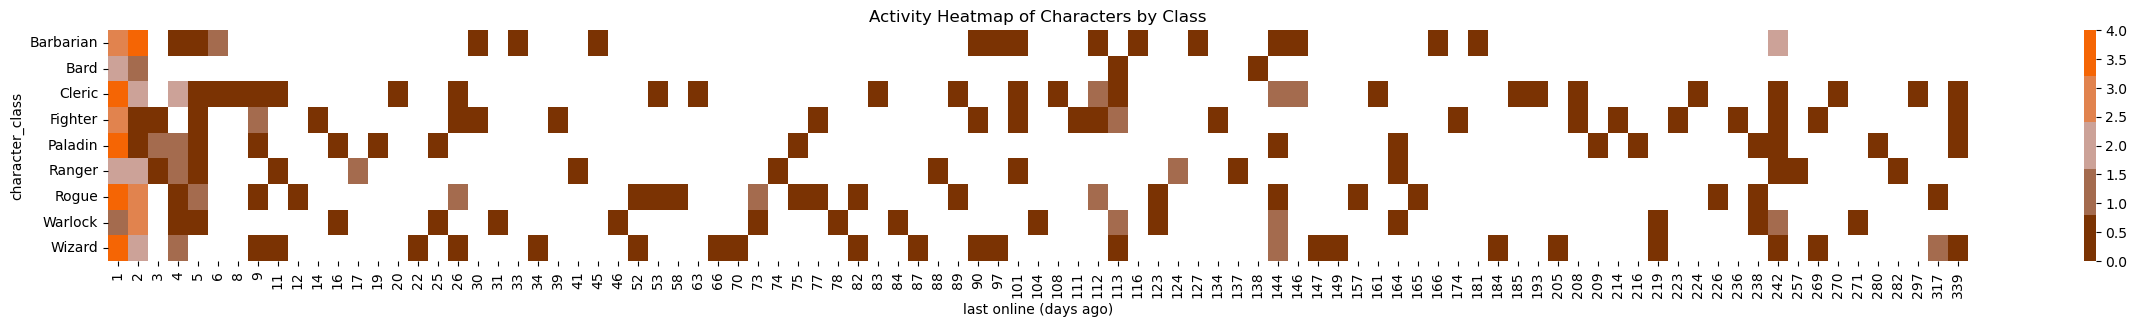

In [95]:
plt.figure(figsize=(30, 3))
sns.heatmap(activity_matrix-1, cmap=nw_cmap_heatmap_5, vmax=4)
plt.xlabel('last online (days ago)')
plt.title('Activity Heatmap of Characters by Class')
plt.yticks(rotation=0)
plt.show()

In [96]:
activity_matrix = _activity_time.pivot_table(index='guild_rank', columns='days_inactive', values='character', aggfunc='count').iloc[:,1:].replace(0,np.nan)
activity_matrix

days_inactive,1,2,3,4,5,6,8,9,11,12,14,16,17,19,20,22,25,26,30,31,33,34,39,41,45,46,52,53,58,63,66,70,73,74,75,77,78,82,83,84,87,88,89,90,97,101,104,108,111,112,113,116,123,124,127,134,137,138,144,146,147,149,157,161,164,165,166,174,181,184,185,193,205,208,209,214,216,219,223,224,226,236,238,242,257,269,270,271,280,282,297,317,339
guild_rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,6.00000,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,1.00000,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,1.00000,1.00000,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,1.00000,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN
2,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,2.00000,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,NaN,NaN,NaN,NaN,4.00000
3,4.00000,5.00000,NaN,NaN,NaN,1.00000,NaN,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,2.00000,NaN,NaN,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN
4,9.00000,13.00000,1.00000,1.00000,5.00000,1.00000,1.00000,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,2.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,3.00000,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,2.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,9.00000,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN
5,8.00000,7.00000,1.00000,11.00000,2.00000,1.00000,NaN,NaN,1.00000,1.00000,1.00000,2.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,1.00000,2.00000,NaN,NaN,NaN,1.00000,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,5.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,6.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,2.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.00000,1.00000,2.00000,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,1.00000,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,4.00000,NaN,NaN,NaN,NaN,5.00000,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,NaN


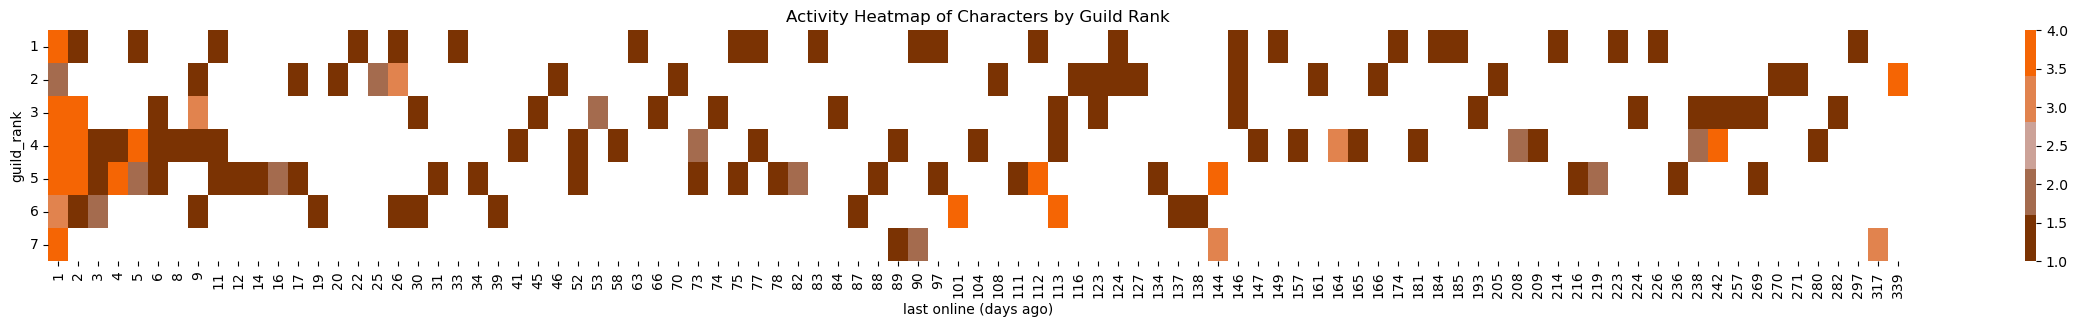

In [97]:
plt.figure(figsize=(30, 3))
sns.heatmap(activity_matrix, cmap=nw_cmap_heatmap_5,vmax=4)
plt.xlabel('last online (days ago)')
plt.title('Activity Heatmap of Characters by Guild Rank')
plt.yticks(rotation=0)
plt.show()

## Characters dropout

In [98]:
df_guild.head(1)

,character,account,character_class,guild_rank,contribution,last_active_date,days_inactive
0,oSwowo,@@2@2#73ncr3o@,Rogue,6,485165,2021-12-28 09:50:03,0


<Axes: >

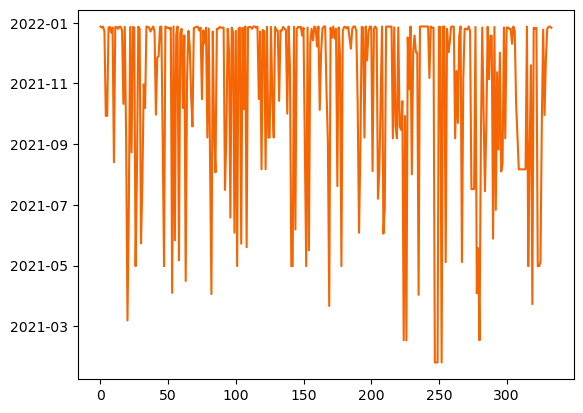

In [99]:
plt.plot()
df_guild['last_active_date'].plot(color=nw_clr_single)

In [100]:
_ts_last_active = df_guild.groupby('last_active_date')['character'].count()
_ts_last_active = _ts_last_active.reset_index().set_index('last_active_date').rename(columns={'character':'characters'})
_ts_last_active.head()

,characters
last_active_date,
2021-01-23 01:48:03,1
2021-01-23 01:50:35,1
2021-01-23 01:52:44,1
2021-01-23 02:05:00,1
2021-02-14 10:31:59,1


<Axes: xlabel='last_active_date'>

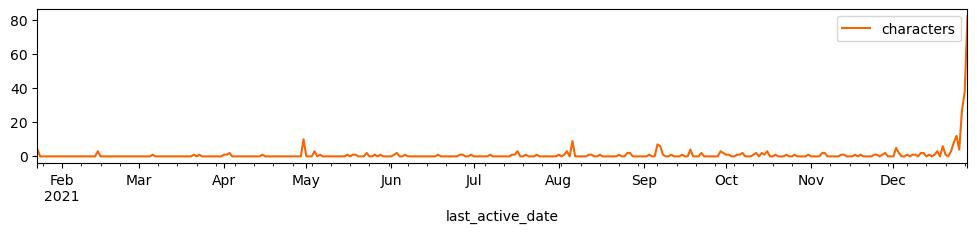

In [101]:
_ts_last_active.resample('D').sum().plot(figsize=(12,2), color=nw_clr_single)

<Axes: xlabel='last_active_date'>

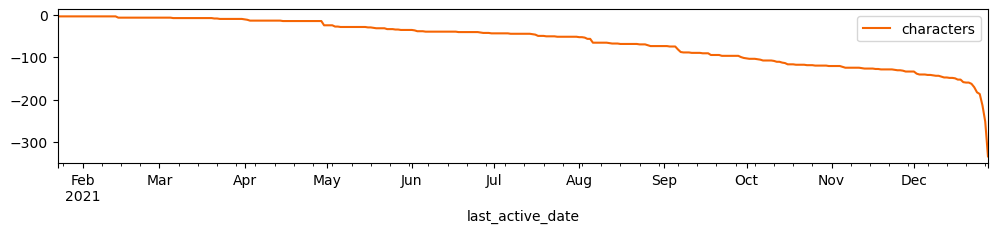

In [102]:
(_ts_last_active.resample('D').sum()*-1).cumsum().plot(figsize=(12,2), color=nw_clr_single)

In [103]:
import datetime as dt
import matplotlib.dates as mdates

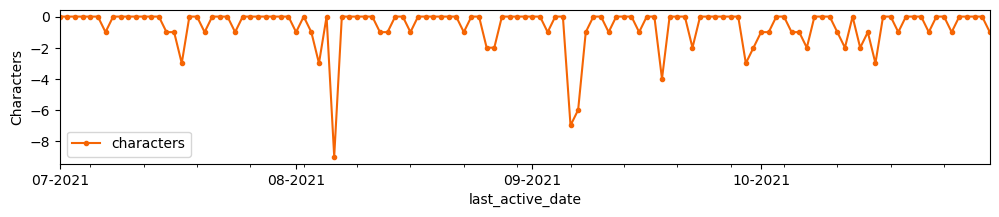

In [104]:
ax = (_ts_last_active.resample('D').sum()*-1).loc['2021-07':'2021-10'].plot(figsize=(12,2), marker='o', linestyle='-', markersize=3, color=nw_clr_single)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

ax.set_ylabel('Characters');

<Axes: xlabel='last_active_date'>

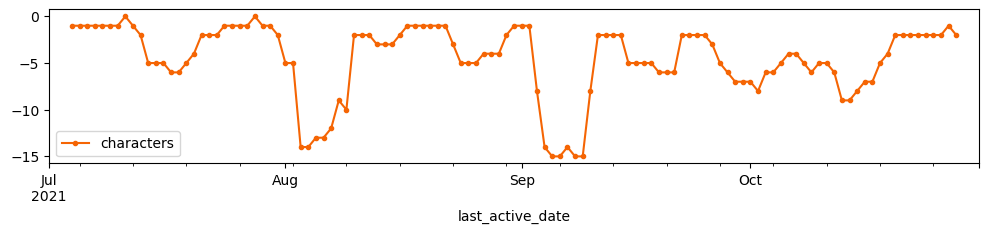

In [105]:
(_ts_last_active.resample('D').sum()*-1).loc['2021-07':'2021-10'].rolling(7, center=True).sum().plot(figsize=(12,2), marker='o', linestyle='-', markersize=3, color=nw_clr_single)

<Axes: xlabel='last_active_date'>

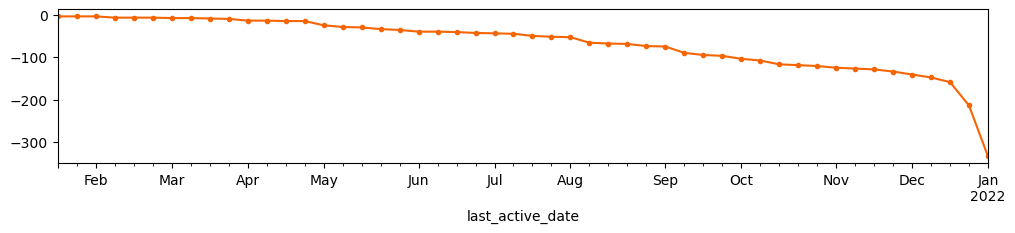

In [106]:
(_ts_last_active.groupby(pd.Grouper(freq='W'))['characters'].sum()*-1).cumsum().plot(figsize=(12,2), marker='o', linestyle='-', markersize=3, color=nw_clr_single)

In [107]:
df_guild['character'].count()

334

In [108]:
[pd.to_datetime('2021-01-23 00:00:01'),df_guild['character'].count()]

[Timestamp('2021-01-23 00:00:01'), 334]

In [109]:
_ts_chars_active = _ts_last_active.copy()*-1
_ts_chars_active.loc[pd.to_datetime('2021-01-23 00:00:01')] = df_guild['character'].count()
_ts_chars_active = _ts_chars_active.sort_index().cumsum()
_ts_chars_active.head()

,characters
last_active_date,
2021-01-23 00:00:01,334
2021-01-23 01:48:03,333
2021-01-23 01:50:35,332
2021-01-23 01:52:44,331
2021-01-23 02:05:00,330


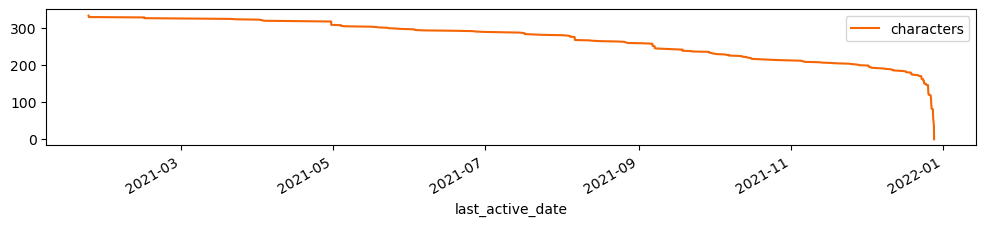

In [110]:
_ts_chars_active.plot(figsize=(12,2), color=nw_clr_single);

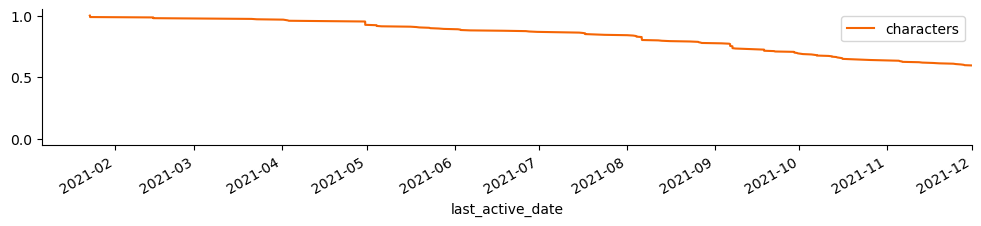

In [111]:
(_ts_chars_active / df_guild['character'].count()).plot(figsize=(12,2), color=nw_clr_single)
plt.xlim(right=dt.datetime(2021, 12, 1))
sns.despine()

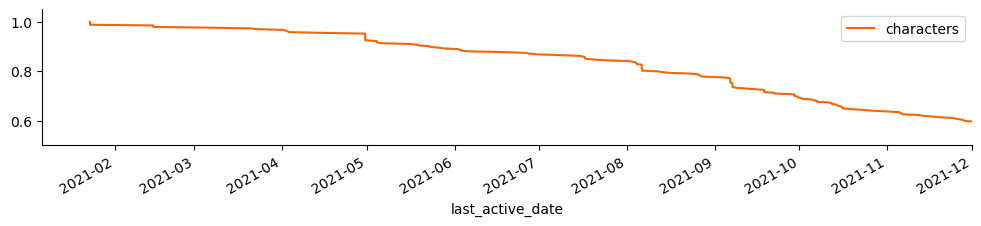

In [112]:
(_ts_chars_active / df_guild['character'].count()).plot(figsize=(12,2), color=nw_clr_single)
plt.xlim(right=dt.datetime(2021, 12, 1))
plt.ylim(bottom=0.5)
sns.despine()

In [113]:
_ts_chars_active['pct_chars'] = _ts_chars_active / df_guild['character'].count()
_ts_chars_active.head()

,characters,pct_chars
last_active_date,,
2021-01-23 00:00:01,334,1.00000
2021-01-23 01:48:03,333,0.99701
2021-01-23 01:50:35,332,0.99401
2021-01-23 01:52:44,331,0.99102
2021-01-23 02:05:00,330,0.98802


In [114]:
_ts_chars_active['abs_dif'] = abs(_ts_chars_active['characters'].diff())
_ts_chars_active

,characters,pct_chars,abs_dif
last_active_date,,,
2021-01-23 00:00:01,334,1.00000,NaN
2021-01-23 01:48:03,333,0.99701,1.00000
2021-01-23 01:50:35,332,0.99401,1.00000
2021-01-23 01:52:44,331,0.99102,1.00000
2021-01-23 02:05:00,330,0.98802,1.00000
...,...,...,...
2021-12-28 12:46:16,4,0.01198,1.00000
2021-12-28 12:46:30,3,0.00898,1.00000
2021-12-28 12:46:31,2,0.00599,1.00000


(2665.0, 2710.0)

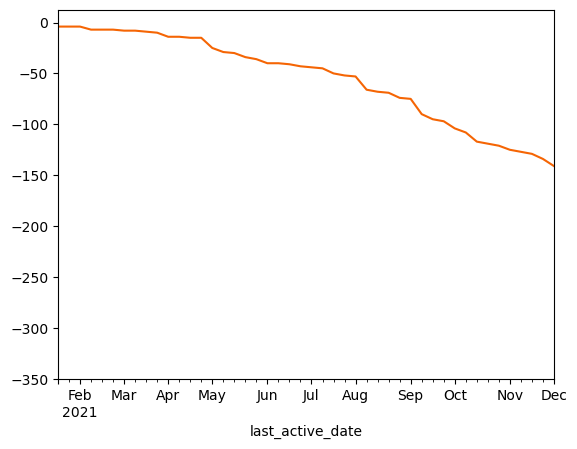

In [115]:
(_ts_chars_active.groupby(pd.Grouper(freq='W'))['abs_dif'].sum()*-1).cumsum().plot(color=nw_clr_single)
plt.xlim(right=dt.datetime(2021, 12, 1))

In [116]:
monthly_characters_diff = _ts_chars_active.groupby(pd.Grouper(freq='M'))['abs_dif'].sum().sort_values(ascending=False)
monthly_characters_diff

last_active_date
2021-12-31   200.00000
2021-09-30    28.00000
2021-08-31    22.00000
2021-10-31    19.00000
2021-04-30    15.00000
2021-11-30    13.00000
2021-05-31    11.00000
2021-06-30     8.00000
2021-07-31     8.00000
2021-01-31     4.00000
2021-02-28     3.00000
2021-03-31     3.00000
Name: abs_dif, dtype: float64

In [117]:
type(monthly_characters_diff)

pandas.core.series.Series

In [118]:
monthly_characters_diff = monthly_characters_diff.iloc[1:].sort_index()
monthly_characters_diff

last_active_date
2021-01-31    4.00000
2021-02-28    3.00000
2021-03-31    3.00000
2021-04-30   15.00000
2021-05-31   11.00000
2021-06-30    8.00000
2021-07-31    8.00000
2021-08-31   22.00000
2021-09-30   28.00000
2021-10-31   19.00000
2021-11-30   13.00000
Name: abs_dif, dtype: float64

In [119]:
monthly_characters_diff.index.month_name()

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November'],
      dtype='object', name='last_active_date')

In [120]:
full_date_range = pd.date_range(start=monthly_characters_diff.index.min(), end=monthly_characters_diff.index.max(), freq='M')
full_date_range

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', freq='ME')

In [121]:
# Reindex the DataFrame to include the full date range, filling missing values with 0
monthly_characters_diff = monthly_characters_diff.reindex(full_date_range, fill_value=0)
monthly_characters_diff

2021-01-31    4.00000
2021-02-28    3.00000
2021-03-31    3.00000
2021-04-30   15.00000
2021-05-31   11.00000
2021-06-30    8.00000
2021-07-31    8.00000
2021-08-31   22.00000
2021-09-30   28.00000
2021-10-31   19.00000
2021-11-30   13.00000
Freq: ME, Name: abs_dif, dtype: float64

In [122]:
_colors = {}
for i,c in enumerate(monthly_characters_diff.index.month_name()):
    if monthly_characters_diff[i]==monthly_characters_diff.max():
        _colors[c]=nw_clr_single
    else:
        _colors[c]=nw_clr_single_greyed

_colors

{'January': '#cca299',
 'February': '#cca299',
 'March': '#cca299',
 'April': '#cca299',
 'May': '#cca299',
 'June': '#cca299',
 'July': '#cca299',
 'August': '#cca299',
 'September': '#f56504',
 'October': '#cca299',
 'November': '#cca299'}

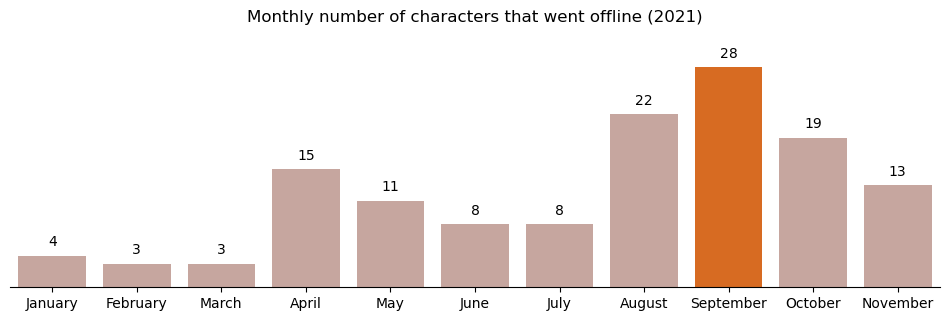

In [123]:
fig, ax = plt.subplots(figsize=(12, 3))
s = sns.barplot(
    ax=ax,
    x=monthly_characters_diff.index.month_name(),
    y=monthly_characters_diff,
    legend=False,
    hue=monthly_characters_diff.index.month_name(),
    palette=_colors
)

for container in s.containers:
    tmp_hue = monthly_characters_diff[monthly_characters_diff.index.month_name()==container.get_label()]
    ax.bar_label(container, labels=tmp_hue, padding=5, fmt='{:,.0f}')

ax.set(ylabel=None, yticks=[])


plt.title('Monthly number of characters that went offline (2021)', pad=25)
plt.xlabel('')
sns.despine(left=True)